In [1]:
!pip install zarr
import os
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import random 
import zarr
import seaborn as sns
import pandas as pd
import tifffile


channels_info_df = pd.read_csv("/scratch/project_2003009/NKI_whole_slides_validation_MHCII/channels_mhcii.csv")
cores_channels_df = pd.read_csv("../data/cores_channel_list.csv",names=["antibody_name"])


Defaulting to user installation because normal site-packages is not writeable


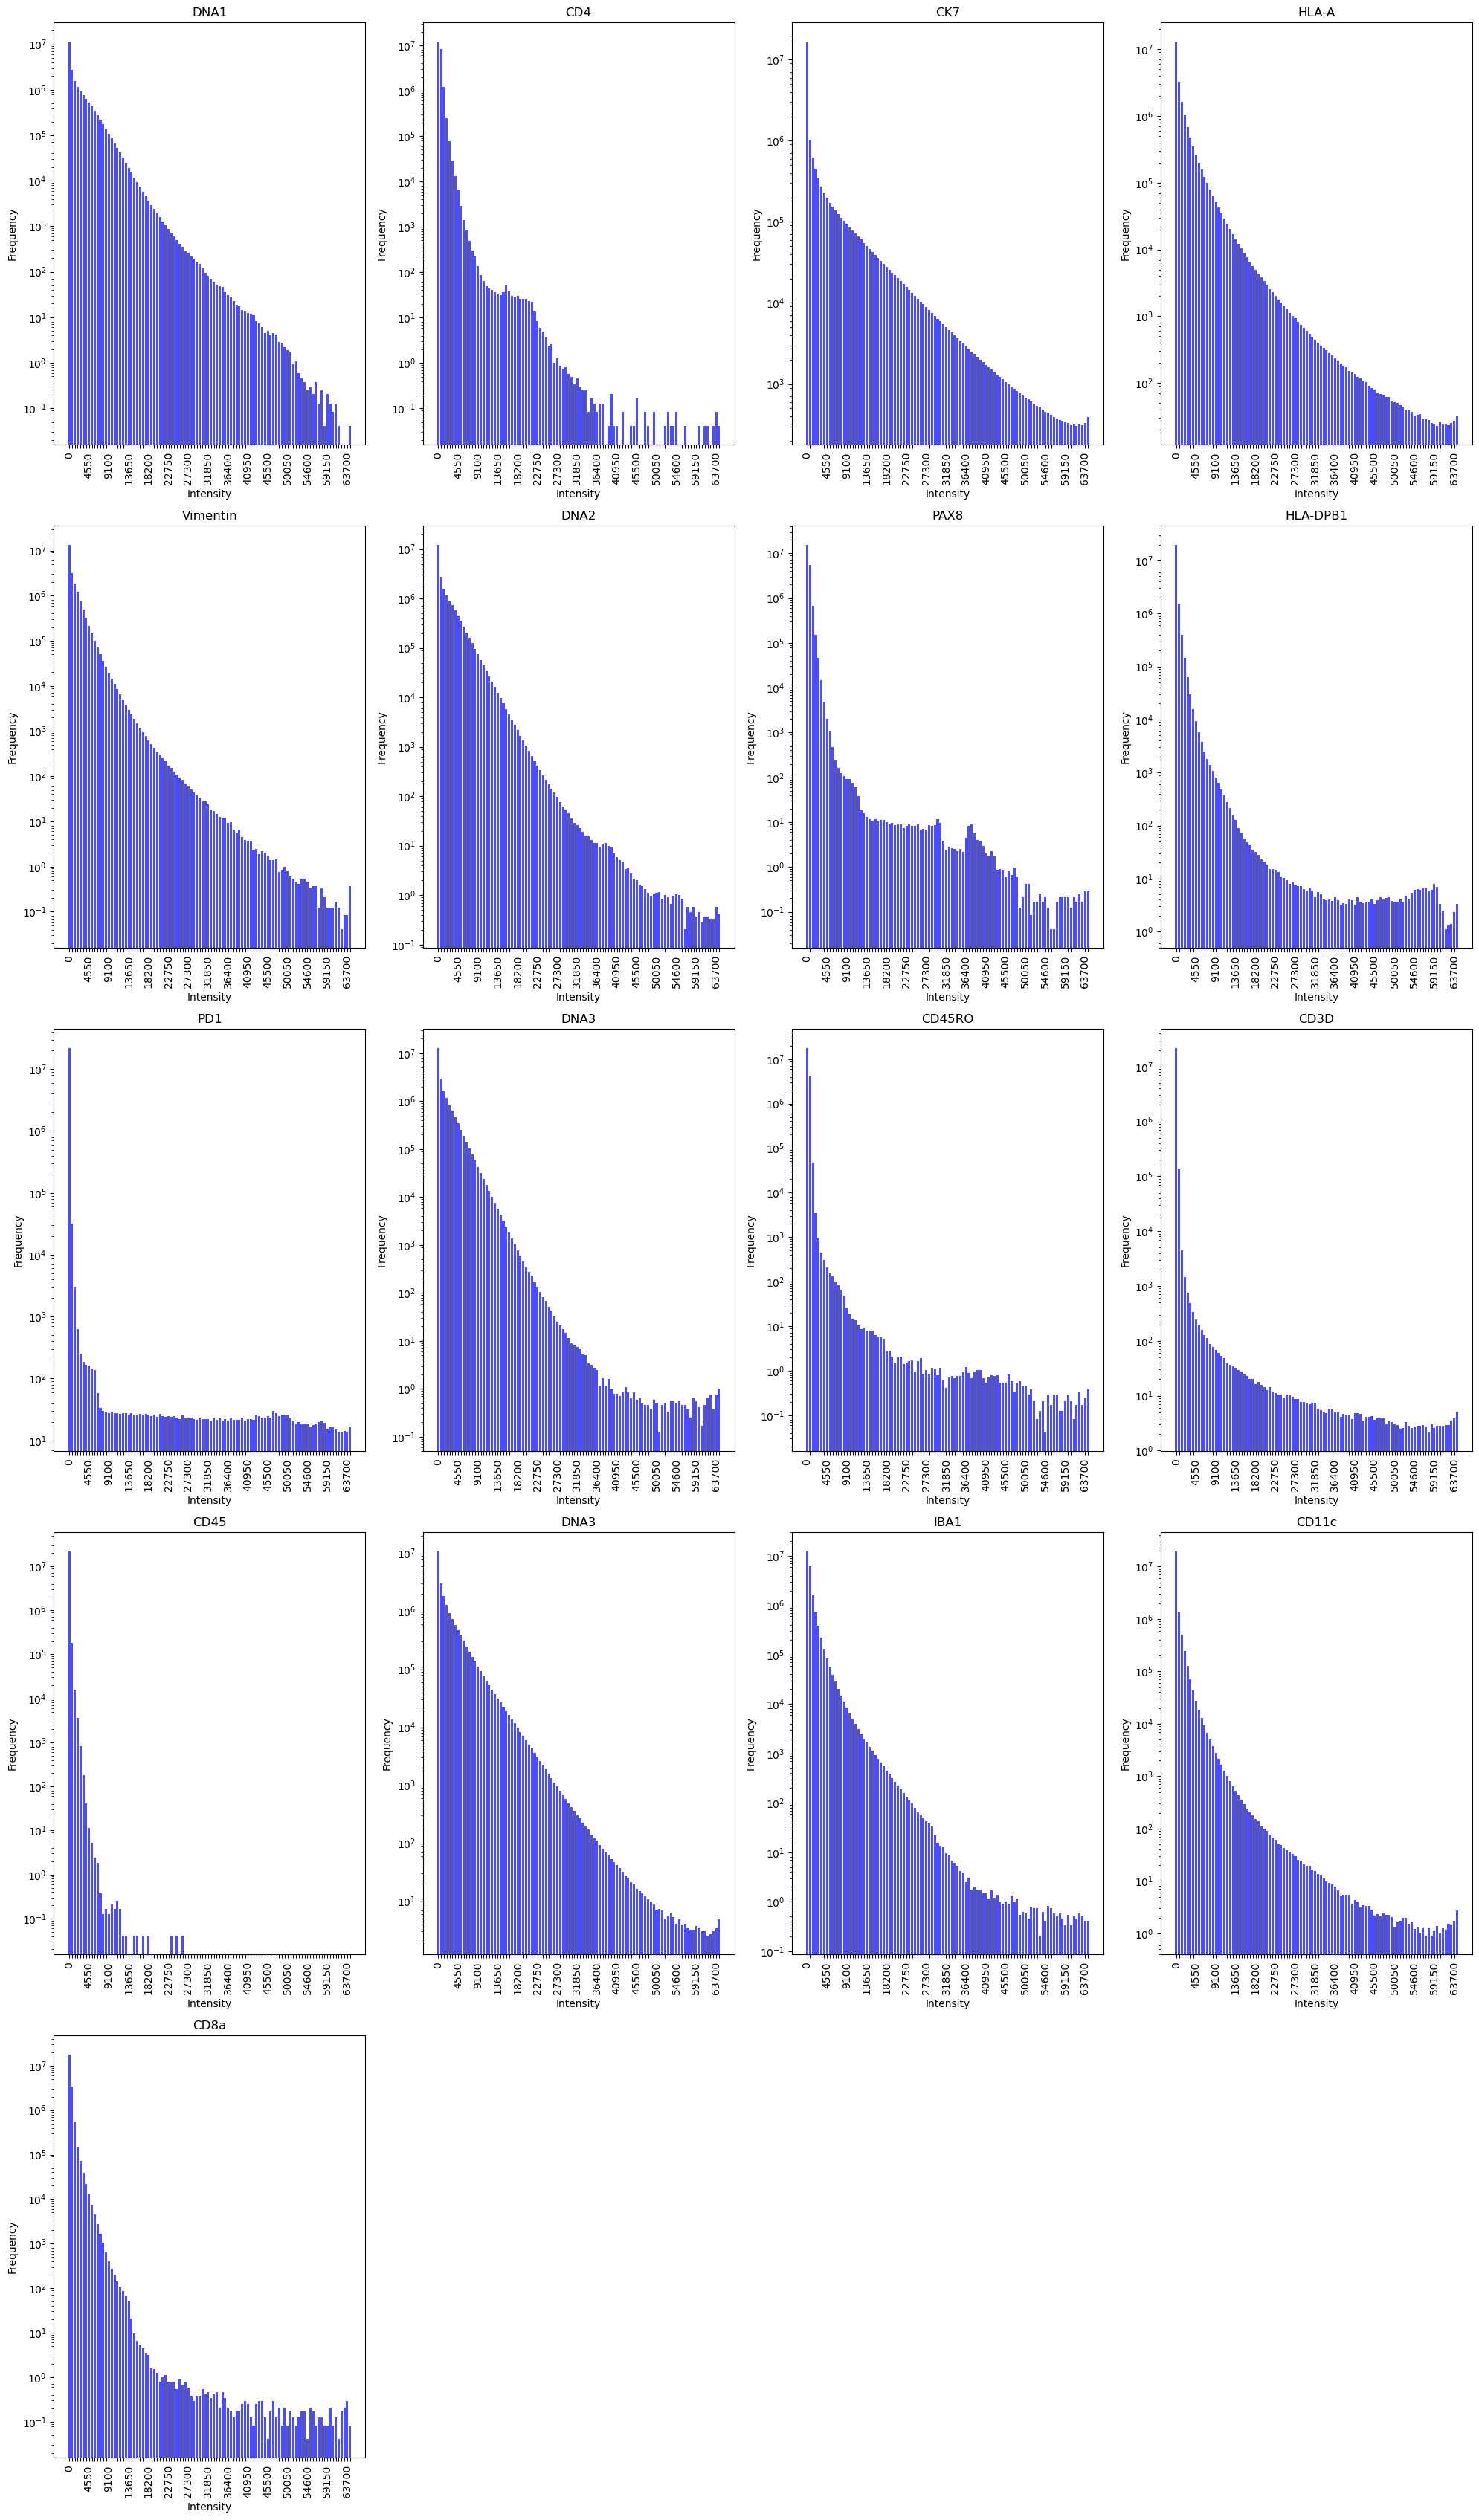

In [9]:
import numpy as np
import tifffile as tiff
import os
from collections import defaultdict
import matplotlib.pyplot as plt

def plot_aggregated_histograms(aggregated_histograms, num_channels, bins=100):
    """
    Plots the aggregated histograms for all channels.
    """
    bin_edges = np.linspace(0, 65000, bins + 1).astype(int)

    plt.figure(figsize=(20, 2 * num_channels))
    
    for channel in range(num_channels):
        plt.subplot(num_channels // 4 + 1, 4, channel + 1)
       #plt.bar(range(bins), aggregated_histograms[channel], color='blue', alpha=0.7)
        #sns.kdeplot(aggregated_histograms[channel], color='blue', fill=False, alpha=0.7)
        plt.bar(range(bins), aggregated_histograms[channel], color='blue', alpha=0.7)
        plt.xticks(range(bins), bin_edges[:-1])
        plt.xticks(rotation=90)
        ax = plt.gca()
        n = 7  # Keeps every 7th label
        [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
        channel_name = channels_info_df.iloc[[channel]]['Antibody'].values[0]
        plt.title(channel_name)
        plt.yscale('log')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.savefig('../data/mhcii_channels_histogram.png')
    plt.show()
    


# Example usage
files_path = '/scratch/project_2003009/NKI_whole_slides_validation_MHCII/'
wsi_directories = []
slides_directories = [d for d in os.listdir(files_path) if
                          os.path.isfile(os.path.join(files_path, d)) and d.startswith('S')]
for i, slide in enumerate(slides_directories):
    wsi_directories.append(str(files_path) + slide)
bins = 100
aggregated_histograms = defaultdict(lambda: np.zeros(bins))
images_array = []
num_channels = None
flattened_data_per_channel = {}
for wsi_file in wsi_directories:
    with tiff.TiffFile(wsi_file, is_ome=False) as image:
        z = zarr.open(image.series[0].aszarr(), mode='r')
        image_file = z[3]
    if not num_channels:
        num_channels = image_file.shape[0]
    for channel in range(num_channels):
        hist, _ = np.histogram(image_file[channel, :, :], bins=bins, range=(0, 65000))
        aggregated_histograms[channel] += hist
for channel in range(num_channels):
    aggregated_histograms[channel] = aggregated_histograms[channel]/24
        #flattened_data_per_channel[channel] = []
        #flattened_data_per_channel[channel].extend(flattened_channel_data)

plot_aggregated_histograms(aggregated_histograms, num_channels, bins=bins)



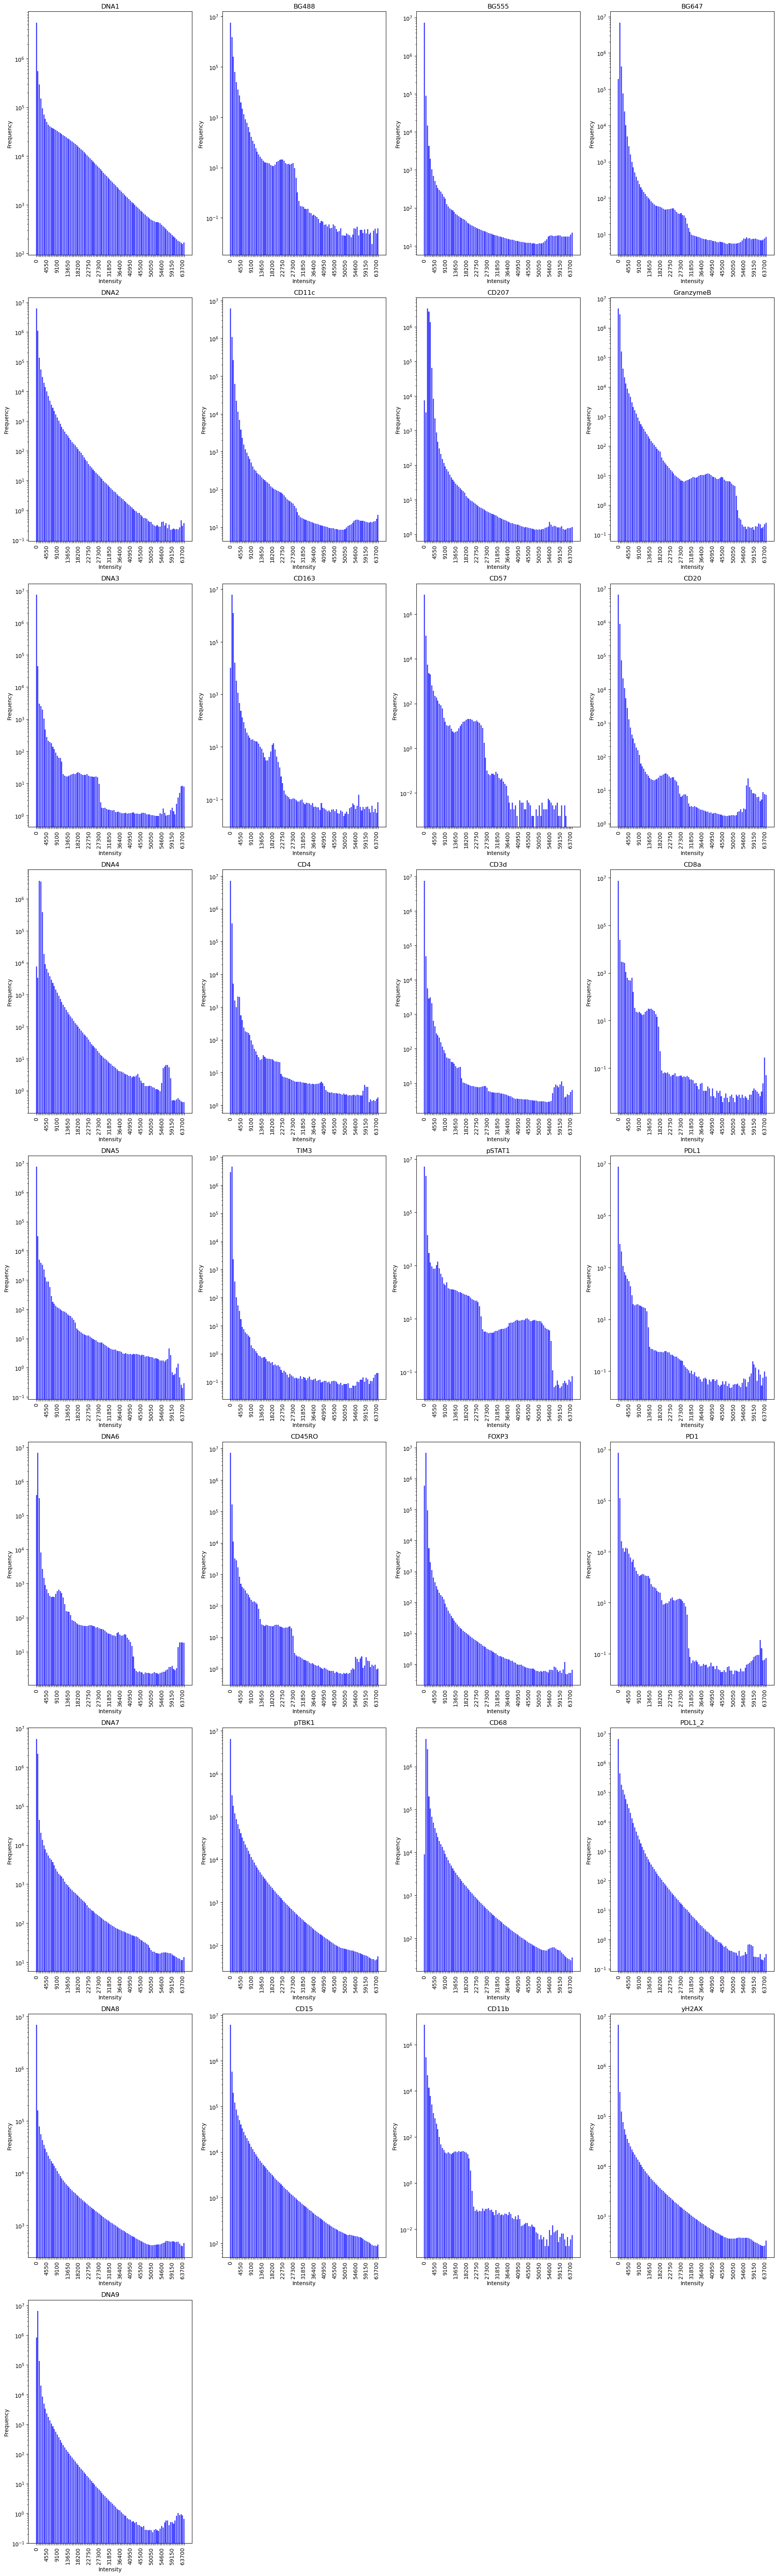

In [2]:
import numpy as np
import tifffile as tiff
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd



def plot_aggregated_histograms(aggregated_histograms, num_channels, bins=100):
    """
    Plots the aggregated histograms for all channels.
    """
    bin_edges = np.linspace(0, 65000, bins + 1).astype(int)

    plt.figure(figsize=(20, 2 * num_channels))
    
    for channel in range(num_channels):
        plt.subplot(num_channels // 4 + 1, 4, channel + 1)
       #plt.bar(range(bins), aggregated_histograms[channel], color='blue', alpha=0.7)
        #sns.kdeplot(aggregated_histograms[channel], color='blue', fill=False, alpha=0.7)
        plt.bar(range(bins), aggregated_histograms[channel], color='blue', alpha=0.7)
        plt.xticks(range(bins), bin_edges[:-1])
        plt.xticks(rotation=90)
        ax = plt.gca()
        n = 7  # Keeps every 7th label
        [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
        channel_name = cores_channels_df.iloc[[channel]]['antibody_name'].values[0]
        plt.title(channel_name)
        plt.yscale('log')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.savefig('../data/nki_cores_channels_histogram.png')

    plt.show()

# Example usage
files_path = '/scratch/project_2003009/NKI_project_TMAs/'
cores_files = []
cores_directories = [d for d in os.listdir(files_path) if
                          os.path.isdir(os.path.join(files_path, d)) and d.startswith('TMA')]
for i, slide in enumerate(cores_directories):
    cores_files_path = str(files_path) + "/" + slide + "/Channels_all"
    cores_files.extend([os.path.join(r, fn)
                        for r, ds, fs in os.walk(cores_files_path)
                        for fn in fs if fn.endswith('.tif')])
bins = 100
aggregated_histograms = defaultdict(lambda: np.zeros(bins))
images_array = []
num_channels = None
flattened_data_per_channel = {}
for core_file in cores_files:
    image_file = tifffile.imread(core_file,maxworkers=28)
    if not num_channels:
        num_channels = image_file.shape[0]
    for channel in range(num_channels):
        hist, _ = np.histogram(image_file[channel, :, :], bins=bins, range=(0, 65000))
        aggregated_histograms[channel] += hist
for channel in range(num_channels):
    aggregated_histograms[channel] = aggregated_histograms[channel]/len(cores_files)
        #flattened_data_per_channel[channel] = []
        #flattened_data_per_channel[channel].extend(flattened_channel_data)

plot_aggregated_histograms(aggregated_histograms, num_channels, bins=bins)



In [12]:
bin_edges = np.linspace(0, 15000, 100 + 1)
bin_edges[:-1]

array([    0.,   150.,   300.,   450.,   600.,   750.,   900.,  1050.,
        1200.,  1350.,  1500.,  1650.,  1800.,  1950.,  2100.,  2250.,
        2400.,  2550.,  2700.,  2850.,  3000.,  3150.,  3300.,  3450.,
        3600.,  3750.,  3900.,  4050.,  4200.,  4350.,  4500.,  4650.,
        4800.,  4950.,  5100.,  5250.,  5400.,  5550.,  5700.,  5850.,
        6000.,  6150.,  6300.,  6450.,  6600.,  6750.,  6900.,  7050.,
        7200.,  7350.,  7500.,  7650.,  7800.,  7950.,  8100.,  8250.,
        8400.,  8550.,  8700.,  8850.,  9000.,  9150.,  9300.,  9450.,
        9600.,  9750.,  9900., 10050., 10200., 10350., 10500., 10650.,
       10800., 10950., 11100., 11250., 11400., 11550., 11700., 11850.,
       12000., 12150., 12300., 12450., 12600., 12750., 12900., 13050.,
       13200., 13350., 13500., 13650., 13800., 13950., 14100., 14250.,
       14400., 14550., 14700., 14850.])